<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [17]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# additional imports for my own tests
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats

## Load the dataframe


Load the data


In [21]:
# original, read from URL
# data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# read from local
data = pd.read_csv('dataset_part_2.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [22]:
# original, read from URL
# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# read from local
X_base = pd.read_csv('dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X_base.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [23]:
heat_map_base=X_base
heat_map_base

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## my TASK 1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [26]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [27]:
heat_map_base['Class']=Y
heat_map_base

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True,Class
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1


In [28]:
print(heat_map_base[['GridFins_True', 'Legs_True', 'Class']].to_markdown())

|    |   GridFins_True |   Legs_True |   Class |
|---:|----------------:|------------:|--------:|
|  0 |               0 |           0 |       0 |
|  1 |               0 |           0 |       0 |
|  2 |               0 |           0 |       0 |
|  3 |               0 |           0 |       0 |
|  4 |               0 |           0 |       0 |
|  5 |               0 |           0 |       0 |
|  6 |               0 |           1 |       1 |
|  7 |               0 |           1 |       1 |
|  8 |               0 |           0 |       0 |
|  9 |               0 |           0 |       0 |
| 10 |               0 |           0 |       0 |
| 11 |               1 |           1 |       0 |
| 12 |               1 |           1 |       1 |
| 13 |               1 |           1 |       0 |
| 14 |               0 |           0 |       0 |
| 15 |               1 |           1 |       0 |
| 16 |               1 |           1 |       1 |
| 17 |               1 |           1 |       0 |
| 18 |              

### Finding: 
Most of the observations show that when GridFins OR Legs are True, Class is True, and that if both are False (0), Class is False too. 
Only 10 of these 90 observations show a different result.

It seems that GridFins and Legs could impact on the result of Class, and this rule is evident in almost 9 out of 10 cases. (around 90% of the cases)

## Creating a heatmap to check if there is correlation among these features.

## Delete unnecessary columns
We'll delete the unnecessary columns for the graph since all the columns will make the graph very difficult to be read and interpret.

The colums to delete are between 16..76, which are the one-hot-encoded columns for LaunchSite, LandingPad and Serials of the boosters, which apparentely don't necessarily impact on the result of the mission.

As they are in the middle of the dataframe we should use iloc twice (1st for the left hand side and then for the right hand side of the dataframe or we can use the drop method. 

In every alternative we need two steps. I chose the "drop" alternative because it seems more legible in the code.
But *drop* requires the explicit names of the columns instead of a numeric range.
Therefore we take the names of the columns and we check that we take the right columns.


In [32]:
columns_to_drop=heat_map_base.iloc[:,16:77]
columns_to_drop.head()

,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we take the names of those columns and check them on the cell's output

In [34]:
column_names_to_drop=columns_to_drop.columns
column_names_to_drop

Index(['LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029',
       'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034',
       'Serial_B1035', 'Serial_B1036', 'Serial_B1037', 'Serial_B1038',
       'Serial_B1039', 'Serial_B1040', 'Serial_B1041', 'Serial_B1042',
       'Serial

Now we delete the columns by using *drop* with those column names, updating the result in the heat_map_base dataframe

In [36]:
heat_map_base=heat_map_base.drop(column_names_to_drop, axis=1)
heat_map_base

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Orbit_SO,Orbit_SSO,Orbit_VLEO,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True,Class
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1


and now we create the heat_map dataframe and apply the corr() method to create the correlation information for every feature (column)

In [38]:
heat_map=heat_map_base.corr(numeric_only=True)

heat_map

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Orbit_SO,Orbit_SSO,Orbit_VLEO,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True,Class
FlightNumber,1.000000,5.963070e-01,0.652842,0.932411,0.735193,-0.132606,1.530070e-01,-0.263658,0.014281,-0.134996,...,1.122051e-01,0.142837,0.552268,-0.442364,0.442364,-0.635844,0.635844,-0.373619,0.373619,4.019226e-01
PayloadMass,0.596307,1.000000e+00,0.665218,0.518165,0.612327,-0.125673,-3.944528e-17,-0.153264,-0.130668,-0.333832,...,-1.080914e-17,-0.210141,0.846786,-0.258011,0.258011,-0.468393,0.468393,-0.192318,0.192318,1.999916e-01
Flights,0.652842,6.652180e-01,1.000000,0.519603,0.684802,-0.069315,1.854898e-02,-0.207009,-0.069315,-0.251871,...,1.942762e-01,0.122857,0.761221,-0.194457,0.194457,-0.782631,0.782631,-0.157727,0.157727,1.497871e-01
Block,0.932411,5.181647e-01,0.519603,1.000000,0.743340,-0.167044,1.002267e-01,-0.191049,0.033409,-0.124198,...,1.002267e-01,0.168173,0.405822,-0.438023,0.438023,-0.548036,0.548036,-0.368994,0.368994,4.160149e-01
ReusedCount,0.735193,6.123271e-01,0.684802,0.743340,1.000000,-0.103184,2.146791e-02,-0.266597,-0.040858,-0.119968,...,8.379411e-02,0.220249,0.573621,-0.410324,0.410324,-0.594109,0.594109,-0.375496,0.375496,4.665836e-01
Orbit_ES-L1,-0.132606,-1.256726e-01,-0.069315,-0.167044,-0.103184,1.000000,-1.123596e-02,-0.069393,-0.011236,-0.058478,...,-1.123596e-02,-0.025709,-0.045495,-0.056659,0.056659,0.088566,-0.088566,-0.054834,0.054834,7.495317e-02
Orbit_GEO,0.153007,-3.944528e-17,0.018549,0.100227,0.021468,-0.011236,1.000000e+00,-0.069393,-0.011236,-0.058478,...,-1.123596e-02,-0.025709,-0.045495,-0.056659,0.056659,-0.126865,0.126865,-0.054834,0.054834,7.495317e-02
Orbit_GTO,-0.263658,-1.532635e-01,-0.207009,-0.191049,-0.266597,-0.069393,-6.939315e-02,1.000000,-0.069393,-0.361158,...,-6.939315e-02,-0.158777,-0.280976,0.233285,-0.233285,0.103483,-0.103483,0.255478,-0.255478,-2.057378e-01
Orbit_HEO,0.014281,-1.306677e-01,-0.069315,0.033409,-0.040858,-0.011236,-1.123596e-02,-0.069393,1.000000,-0.058478,...,-1.123596e-02,-0.025709,-0.045495,-0.056659,0.056659,0.088566,-0.088566,-0.054834,0.054834,7.495317e-02
Orbit_ISS,-0.134996,-3.338319e-01,-0.251871,-0.124198,-0.119968,-0.058478,-5.847768e-02,-0.361158,-0.058478,1.000000,...,-5.847768e-02,-0.133801,-0.236779,-0.042126,0.042126,0.193988,-0.193988,-0.092268,0.092268,-5.572782e-02


Now we calculate the Pearson coefficients and P_values for the potential correlation between Class and GridFines_True and between Class and Legs_True"

In [40]:
pearson_coef_GridFins, p_value_GridFins=stats.pearsonr(heat_map_base['Class'], heat_map_base['GridFins_True'])
pearson_coef_Legs, p_value_Legs=stats.pearsonr(heat_map_base['Class'], heat_map_base['Legs_True'])

## my TASK  2

Create the heatmap graph based on the heat_map dataframe created in **"my TASK 1"**

Create a heatmap graph based on the heat_map dataframe.

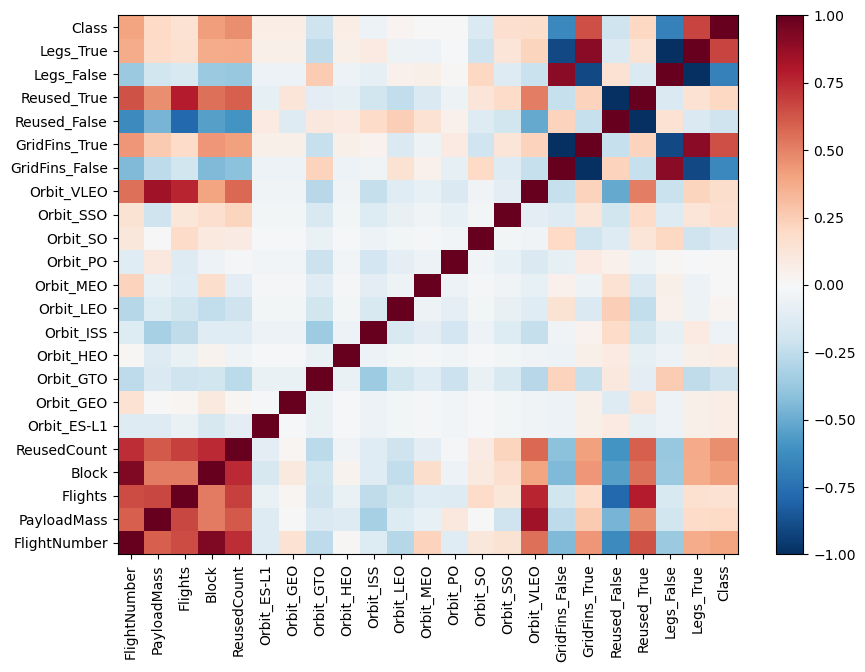

In [43]:
fig, ax = plt.subplots(figsize=(10,7))
im = ax.pcolor(heat_map, cmap='RdBu_r')

#label names
row_labels = heat_map.columns
col_labels = heat_map.index

#move ticks and labels to the center
ax.set_xticks(np.arange(heat_map.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(heat_map.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [44]:
print("Pearson coefficient between Class and GridFins_True: ", pearson_coef_GridFins, " - P value: ", p_value_GridFins)
print("Pearson coefficient between Class and Legs_True: ", pearson_coef_Legs, " - P value: ", p_value_Legs)

Pearson coefficient between Class and GridFins_True:  0.6425396041156864  - P value:  8.683106935398748e-12
Pearson coefficient between Class and Legs_True:  0.6738249250744541  - P value:  3.383518794154005e-13


# Conclusions:
In the heatmap chart we can see that there are a couple of medium to strong correlations between the features Class, GridFins and Legs features.
Dark Red represents a strong and positive correlation.
Dark Blue represents a strong and negative correlation.
Light colors represent weaker or even inexistent correlations.

It seems we discovered why, with flight numbers increasing and thus the experience, finally something is appear to be correlated with the success of the landing:
In the initial flights there were no Gridfins or Legs installed, so those features were in "False". However in some moment they were installed, the features on such observations were registered as True and finally impacted in some way in the result of the landing.
Surely there are other factors not covered on the dataset, and now in the real life in 2024 with much more experience there will be even more features to analyze, but this finding sounds interesting as a conclusion for this exercise.

After the graph we show the Pearson correlation numbers for these specific features and they confirm a medium to strong positive correlation (0.64-0.67, where 1 means strong correlation and 0 means "no correlation"), and the P_value, which are extremely low (<0.001), which means a strong certainty in the result.

Correlation doesn't imply causation but in this case sounds reasonable that once the gridfins were installed and functional the boosters were able to be guided to the landing pad (on ground or on the sea), and once the legs were installed and functional the boosters could finally land. 